# Simple cross validation with SVM and Iris data

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data.
def load_iris():
    return pd.read_csv("iris.data", names=["Sepal length", "Sepal width", "Petal length", "Petal width", "Species"])
    
iris = load_iris()

# Put away one row from each of target classes Iris-setosa, Iris-versicolor and Iris-viriginica.
rows = [1, 50, 100]
test = iris.loc[rows]
iris = iris.drop(iris.index[rows])

In [3]:
# Preprocess data.
def classname2number(df):
    df.loc[df["Species"] == "Iris-setosa",     ["Species"]] = 0
    df.loc[df["Species"] == "Iris-versicolor", ["Species"]] = 1
    df.loc[df["Species"] == "Iris-virginica",  ["Species"]] = 2

classname2number(test)
classname2number(iris)

# Split dataset to features and target classes.
X = iris[["Sepal length", "Sepal width", "Petal length", "Petal width"]]
y = iris["Species"]

In [4]:
# Train linear SVM. Multiclass classification is solved using one-vs-one method.
# Note the StandardScaler.
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel="linear", C=1.0, gamma=2))
clf.fit(X, y.tolist())

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [5]:
# Predict using linear SVM model.
# The prediction will be correct if model classify data as 0, 1 and 2.
for r in test.iterrows():
    X_tmp  = list(r[1])[0:4]
    y_true = list(r[1])[-1]
    
    print clf.predict([X_tmp])[0], y_true

0 0
1 1
2 2


In [6]:
# The prediction was correct, but how good is our linear SVM model generally? 

# Load Iris data again.
iris = load_iris()
classname2number(iris)

# http://stats.stackexchange.com/a/19051
# Data should be always (if number of data allows) split to three chunks: 
# training data, validation data and test data. Preferably in ratio 50/25/25.

# Shuffle data.
np.random.seed(seed=1)
iris_shuffle = iris.iloc[np.random.permutation(len(iris))]

# Convert to numpy array.
iris_array = np.array(iris_shuffle, dtype=np.float64)

In [7]:
# Split to test and train_val dataset.
idx = np.int(np.ceil(0.25*len(iris)))

test      = iris_array[1:idx,]
train_val = iris_array[idx:,]

In [8]:
# Train SVM with various parameters using pipeline.
# Returns array of scores of the estimator for each run of the cross validation.
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel="linear", C=1.0, gamma=2))
cross_validation.cross_val_score(clf, train_val[:, 0:4], train_val[:,-1].tolist(), cv=4)

array([ 1.        ,  0.96428571,  0.96296296,  0.96296296])

In [9]:
# After we are satisfied with result obtained from cross-validation, model can be applied on test data.
clf.fit(train_val[:, 0:4], train_val[:,-1].tolist())

# Predict.
y_pred = clf.predict(test[:, 0:4])

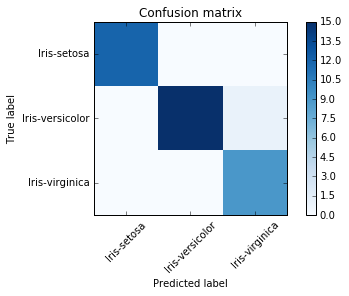

In [10]:
# Confusion matrix.
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["Iris-setosa", "Iris-versicolor", "Iris-virginica"], rotation=45)
    plt.yticks(tick_marks, ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_test = test[:, -1]    
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm)